# CEO-Request Challenge


🕵🏻 **Should Olist remove underperforming sellers from its marketplace ?**

## Problem statement

🕵🏻 To analyse the impact of removing the worse sellers from Olist's marketplace, we can start with a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? For that:

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

💡Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from olist import order, seller, product
from olist.data import Olist

### A. Analysis ideas:
        
**Olist Side**:

- seller can have bad reviews, but sells a lot (more revenue for olist) - **Key decision**

**Seller Side**:
- minimum sales for seller to make profit (80 * 1.1)
- help seller get better reviews (why seller has bad reviews)
- Seller with bad reviews but big revenue for Olist

**Extra**
- where are bad sellers located (map of sellers)

## Revenue Analysis

### Olist Revenue

In [2]:
seller = seller.Seller().get_training_data()

In [5]:
olist_revenue = seller.copy()

#10% column
olist_revenue["ten_precent"] = olist_revenue["sales"] * 0.1

# number of active months
olist_revenue["num_months"] = np.ceil((((olist_revenue["date_last_sale"] - olist_revenue["date_first_sale"]).dt.days)/ 30))
olist_revenue["num_months"] = olist_revenue["num_months"].apply(lambda x: 1 if x == 0 else x)

# total monthly cost for seller
olist_revenue["total_monthly"] = olist_revenue["num_months"] * 80

# total olist revenue per seller so far
olist_revenue["olist_revenue"] = olist_revenue["ten_precent"] + olist_revenue["total_monthly"]

### Seller Revenue

In [6]:
# total seller revenue so far
olist_revenue["seller_revenue"] = olist_revenue["sales"] - olist_revenue["olist_revenue"]

In [7]:
olist_revenue

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,share_of_one_stars,share_of_five_stars,review_score,n_orders,quantity,quantity_per_order,sales,ten_precent,num_months,total_monthly,olist_revenue,seller_revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,0.333333,0.333333,3.00,3,3,1.000000,218.70,21.870,4.0,320.0,341.870,-123.170
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,0.050000,0.725000,4.55,40,41,1.025000,11703.07,1170.307,15.0,1200.0,2370.307,9332.763
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.000000,1.000000,5.00,1,1,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.000000,1.000000,5.00,1,1,1.000000,79.99,7.999,1.0,80.0,87.999,-8.009
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,1.000000,0.000000,1.00,1,1,1.000000,167.99,16.799,1.0,80.0,96.799,71.191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.000000,1.000000,5.00,2,2,1.000000,158.00,15.800,1.0,80.0,95.800,62.200
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,0.100000,0.500000,4.10,10,10,1.000000,889.00,88.900,14.0,1120.0,1208.900,-319.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,0.000000,1.000000,5.00,6,7,1.166667,550.04,55.004,5.0,400.0,455.004,95.036
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,0.000000,0.500000,4.25,8,11,1.375000,297.00,29.700,5.0,400.0,429.700,-132.700


## Cost Analysis

### Loss per Review

In [8]:
data = Olist().get_matching_table()

In [9]:
review_score = order.Order().get_review_score()
review_score_seller = review_score.merge(data, on="order_id")[["order_id", "seller_id", 
                                                               'dim_is_five_star', 'dim_is_one_star', 'review_score']]

In [10]:
review_score_dict = {1:100, 2:50, 3:40, 4:0, 5:0}
review_score_seller["review_score_cost"] = review_score_seller["review_score"].map(review_score_dict)

# group by seller id and sum review_score_cost
review_score_cost = review_score_seller.groupby("seller_id", as_index=False).sum()[["seller_id", "review_score_cost"]]

In [11]:
review_score_cost.rename({"review_score_cost": "total_review_cost"}, inplace=True, axis=1)
review_score_cost.sort_values("total_review_cost", inplace=True, ascending=False)
review_score_cost = review_score_cost.merge(olist_revenue, on="seller_id")[["seller_id", "total_review_cost", "olist_revenue"]]
review_score_cost

,seller_id,total_review_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,20312.389
4,1f50f920176fa81dab994f9023523100,24400,12133.921
...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,348.700


### IT - Cost

In [12]:
tot_orders = data["order_id"].count()

In [13]:
# calculate cost per order, if for all orders cost = 500.000
it_cost_per_order = 500_000/tot_orders
it_cost_per_order

4.816723664563364

In [14]:
order_per_seller = seller[["seller_id", "n_orders"]].copy()
order_per_seller["it_cost"] = (order_per_seller["n_orders"] * it_cost_per_order).map(np.sqrt)
order_per_seller

,seller_id,n_orders,it_cost
0,3442f8959a84dea7ee197c632cb2df15,3,3.801338
1,d1b65fc7debc3361ea86b5f14c68d2e2,40,13.880524
2,ce3ad9de960102d0677a81f5d0bb7b2d,1,2.194704
3,c0f3eea2e14555b6faeea3dd58c1b1c3,1,2.194704
4,51a04a8a6bdcb23deccc82b0b80742cf,1,2.194704
...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,2,3.103780
2963,f8201cab383e484733266d1906e2fdfa,10,6.940262
2964,74871d19219c7d518d0090283e03c137,6,5.375904
2965,e603cf3fec55f8697c9059638d6c8eb5,8,6.207559


<AxesSubplot:xlabel='n_orders', ylabel='it_cost'>

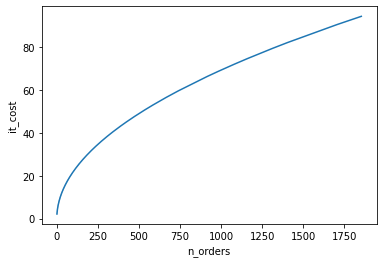

In [15]:
sns.lineplot(x="n_orders", y ="it_cost", data=order_per_seller)

### Total Cost per Seller

In [16]:
total_seller_cost = review_score_cost.merge(order_per_seller, on="seller_id")
total_seller_cost.drop("n_orders", axis=1, inplace=True)

In [17]:
total_seller_cost.columns

Index(['seller_id', 'total_review_cost', 'olist_revenue', 'it_cost'], dtype='object')

In [21]:
total_seller_cost = total_seller_cost[['seller_id', 'total_review_cost', 'it_cost', 'olist_revenue']]
total_seller_cost

,seller_id,total_review_cost,it_cost,olist_revenue
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842
3,7c67e1448b00f6e969d365cea6b010ab,29950,68.775160,20312.389
4,1f50f920176fa81dab994f9023523100,24400,82.235516,12133.921
...,...,...,...,...
2962,4fae87d32467e18eb46e4a76a0a0b9ce,0,2.194704,90.090
2963,bba8d0c234a52b87b3957037a215d1a4,0,2.194704,92.000
2964,4f1f1c8666cdb6442f775c4e8caed465,0,3.103780,174.498
2965,bbe87dce25ba8b38bb61cc7210a3f10b,0,3.103780,348.700



2️⃣ # We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

In [22]:
bad_sellers = total_seller_cost.copy()


bad_sellers["total_cost"] = bad_sellers["total_review_cost"] + bad_sellers["it_cost"]

bad_sellers = bad_sellers[bad_sellers["total_cost"] > bad_sellers["olist_revenue"]]
bad_sellers["olist_loss"] = bad_sellers["total_cost"] - bad_sellers["olist_revenue"]
# talk with sellers, they are shit

In [23]:
# sort by olist loss
bad_sellers.sort_values("olist_loss", ascending=False)

,seller_id,total_review_cost,it_cost,olist_revenue,total_cost,olist_loss
1,6560211a19b47992c3666cc44a7e94c0,38880,94.499765,13850.483,38974.499765,25124.016765
0,4a3ca9315b744ce9f8e9374361493884,42340,93.268446,21647.292,42433.268446,20785.976446
2,cc419e0650a3c5ba77189a1882b7556a,31230,90.649493,12028.842,31320.649493,19291.807493
6,ea8482cd71df3c1969d7b9473ff13abc,21390,74.296469,4757.752,21464.296469,16706.544469
13,8b321bb669392f5163d04c59e235e066,15690,67.395626,2553.569,15757.395626,13203.826626
...,...,...,...,...,...,...
1673,2a50b7ee5aebecc6fd0ff9784a4747d6,100,2.194704,99.980,102.194704,2.214704
1573,19484c79cef6c062cb177aa4ef2fcc3c,100,2.194704,100.190,102.194704,2.004704
846,95b293867b5862941c9cd74f756a3c68,300,6.584111,304.810,306.584111,1.774111
1419,a4b8d97cd5d3674eeff96abc99d8ed67,100,2.194704,101.408,102.194704,0.786704


### Total Olist Loss

In [24]:
bad_sellers["olist_loss"].sum()

352550.5139183469

<details>
    <summary>- <i>Hints</i> -</summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

⚠️ Do no start from scratch ! Investigate your source code in `seller.py` : 
- how was the mean `review_score` per seller computed? 
- Can you think about  a way to update your code to incorporate the `cost_of_reviews`? 

</details>
